# 🎪 Tutorial 8: The AB Testing Laboratory - Statistical Experiments in Action! 🎪

## 🎯 Learning Objectives

By the end of this tutorial, you will be able to:

1. **🔬 Master AB Testing Fundamentals**: Understand the principles of experimental design and statistical testing
2. **📊 Analyze Sample Proportions**: Calculate differences in proportions and assess their statistical significance
3. **🎪 Apply Chi-Square Tests**: Perform goodness-of-fit and independence tests with real-world data
4. **🌍 Connect Theory to Practice**: Apply statistical concepts to business, healthcare, and social science scenarios
5. **🎨 Create Professional Visualizations**: Develop compelling charts and graphs for statistical analysis
6. **🧮 Make Data-Driven Decisions**: Use statistical evidence to support or reject hypotheses

## 🎪 Welcome to the AB Testing Laboratory! 🎪

Welcome to the most exciting statistical laboratory in the universe! 🌟 Here, we'll explore the fascinating world of **AB Testing** - the backbone of modern data-driven decision making. From testing new website designs to evaluating medical treatments, AB testing helps us make informed choices based on statistical evidence rather than gut feelings.

### 🌟 Why AB Testing Matters:
- **🎯 Business Impact**: Companies like Google, Facebook, and Amazon run thousands of AB tests daily
- **🏥 Medical Research**: Clinical trials use AB testing principles to evaluate treatments
- **📊 Social Science**: Researchers test interventions to improve education, health, and society
- **🔬 Scientific Method**: AB testing embodies the scientific approach to knowledge discovery

### 🎪 What We'll Explore:
1. **📈 Difference in Sample Proportions**: How to compare success rates between two groups
2. **🎯 Chi-Square Goodness of Fit**: Testing if observed data matches expected patterns
3. **🔬 Chi-Square Test of Independence**: Determining if two categorical variables are related
4. **🌍 Real-World Applications**: HR analytics, quality control, and business optimization

Let's dive into the world of statistical experiments! 🚀

# 🎯 Challenge 1: The Quality Control Detective Agency! 🎯

## 🚗 The Automotive Investigation Challenge! 🚗

Welcome to the **Quality Control Detective Agency**! 🕵️‍♂️ You've been hired as a statistical detective to investigate a critical quality control issue in the automotive industry. Two major car manufacturers, **Manufacturer A** and **Manufacturer B**, are claiming different defect rates for their vehicles, and it's your job to determine if there's a statistically significant difference!

### 🎪 The Case File:
- **Manufacturer A**: Claims 11% of their cars have a certain defect
- **Manufacturer B**: Claims 8% of their cars have the same defect  
- **Sample Size**: 300 cars from each manufacturer (out of 4500 total produced monthly)
- **Mission**: Determine if the difference in defect rates is statistically significant

### 🧮 Statistical Detective Work:

Before we dive into the code, let's understand the **mathematical conditions** we need to check:

#### 🔍 **Independence Conditions:**
1. **10% Rule**: Each sample must be ≤ 10% of its population
   - $n_A \leq 0.1 \times N_A$ and $n_B \leq 0.1 \times N_B$
   - Ensures samples are independent of each other

#### 📊 **Gaussian Distribution Conditions:**
2. **Success-Failure Condition**: Each sample must have ≥ 10 successes and ≥ 10 failures
   - $n_A \times p_A \geq 10$ and $n_A \times (1-p_A) \geq 10$
   - $n_B \times p_B \geq 10$ and $n_B \times (1-p_B) \geq 10$
   - Ensures the sampling distribution is approximately normal

#### 🎯 **Distribution Properties:**
If conditions are met, the distribution of $\hat{p}_A - \hat{p}_B$ has:
- **Mean**: $\mu = p_A - p_B$
- **Standard Deviation**: $\sigma = \sqrt{\frac{p_A(1-p_A)}{n_A} + \frac{p_B(1-p_B)}{n_B}}$
- **Shape**: Approximately Gaussian (Normal)

### 🎪 Your Mission:
1. **🔬 Design a statistical function** that validates these conditions
2. **📊 Calculate the distribution properties** of the difference in proportions
3. **🎨 Visualize the results** if the distribution is Gaussian
4. **🎯 Make a statistical conclusion** about the defect rate difference

Ready to solve this automotive mystery? 🚀 








In [1]:
# 🎪 Welcome to the AB Testing Laboratory! Let's set up our tools! 🎪
print("🎪 Welcome to the AB Testing Laboratory!")
print("🔬 Setting up our statistical detective toolkit...")

# 🎯 Import our essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chisquare, chi2
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

# 🎨 Set up our beautiful plotting style
plt.style.use('default')
sns.set_palette("husl")

# 🎪 Create our custom color palette for AB testing
ab_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
             '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']

print("🌟 Statistical tools loaded successfully!")
print("🎨 Beautiful visualizations ready!")
print("🚀 Ready to solve statistical mysteries!")


🎪 Welcome to the AB Testing Laboratory!
🔬 Setting up our statistical detective toolkit...
🌟 Statistical tools loaded successfully!
🎨 Beautiful visualizations ready!
🚀 Ready to solve statistical mysteries!


In [2]:
# 🕵️‍♂️ Statistical Detective Function: Quality Control Analysis! 🕵️‍♂️
print("🕵️‍♂️ Creating our statistical detective function...")
print("🔬 This function will solve the automotive quality control mystery!")

def gaussian_detective(x, mu, sigma):
    """
    🎪 Gaussian Distribution Function for our detective work
    
    Parameters:
    -----------
    x : array-like
        Input values
    mu : float
        Mean of the distribution
    sigma : float
        Standard deviation of the distribution
        
    Returns:
    --------
    array-like
        Gaussian probability density function values
    """
    f_x = (1 / np.sqrt(2*np.pi*sigma*sigma)) * np.exp(-(x - mu)*(x - mu) / (2*sigma*sigma))
    return f_x

def quality_control_detective(p_A, p_B, n_A, n_B, N_A, N_B, manufacturer_A="Manufacturer A", manufacturer_B="Manufacturer B"):
    """
    🕵️‍♂️ Quality Control Detective Function
    
    This function investigates the difference in defect rates between two manufacturers
    and determines if the difference is statistically significant.
    
    Parameters:
    -----------
    p_A, p_B : float
        True proportions of defects for manufacturers A and B
    n_A, n_B : int
        Sample sizes for each manufacturer
    N_A, N_B : int
        Total population sizes for each manufacturer
    manufacturer_A, manufacturer_B : str
        Names of the manufacturers
        
    Returns:
    --------
    tuple
        (mean_difference, std_difference, shape, conditions_met)
    """
    
    print(f"\n🕵️‍♂️ QUALITY CONTROL DETECTIVE REPORT")
    print("="*60)
    print(f"🚗 Investigating: {manufacturer_A} vs {manufacturer_B}")
    print(f"📊 Defect Rates: {p_A:.1%} vs {p_B:.1%}")
    print(f"📈 Sample Sizes: {n_A} vs {n_B}")
    print(f"🏭 Population Sizes: {N_A:,} vs {N_B:,}")
    
    # 🔍 Checking the "10% condition" for independent samples
    p_threshold = 0.1  # 10% threshold
    independence_A = n_A / N_A <= p_threshold
    independence_B = n_B / N_B <= p_threshold
    
    print(f"\n🔍 INDEPENDENCE CHECK:")
    print(f"   {manufacturer_A}: {n_A:,}/{N_A:,} = {n_A/N_A:.1%} {'✅' if independence_A else '❌'}")
    print(f"   {manufacturer_B}: {n_B:,}/{N_B:,} = {n_B/N_B:.1%} {'✅' if independence_B else '❌'}")
    
    if not independence_A or not independence_B:
        print(f"\n🚨 DETECTIVE CONCLUSION:")
        print(f"   ❌ Cannot assume independence of samples!")
        print(f"   🔬 Statistical analysis cannot proceed safely.")
        return None, None, None, False
    
    # 🎯 Calculate distribution properties
    p_dif = p_A - p_B
    sigma_dif = np.sqrt((p_A*(1-p_A))/n_A + (p_B*(1-p_B))/n_B)
    
    print(f"\n📊 DISTRIBUTION PROPERTIES:")
    print(f"   🎯 Mean Difference: {p_dif:.3f} ({p_dif:.1%})")
    print(f"   📈 Standard Deviation: {sigma_dif:.4f}")
    
    # 🔍 Checking the "success-failure condition" for Gaussian distribution
    shape_threshold = 10
    conditions = {
        'A_successes': n_A * p_A,
        'A_failures': n_A * (1 - p_A),
        'B_successes': n_B * p_B,
        'B_failures': n_B * (1 - p_B)
    }
    
    print(f"\n🔍 GAUSSIAN DISTRIBUTION CHECK:")
    print(f"   {manufacturer_A} Successes: {conditions['A_successes']:.1f} {'✅' if conditions['A_successes'] >= shape_threshold else '❌'}")
    print(f"   {manufacturer_A} Failures: {conditions['A_failures']:.1f} {'✅' if conditions['A_failures'] >= shape_threshold else '❌'}")
    print(f"   {manufacturer_B} Successes: {conditions['B_successes']:.1f} {'✅' if conditions['B_successes'] >= shape_threshold else '❌'}")
    print(f"   {manufacturer_B} Failures: {conditions['B_failures']:.1f} {'✅' if conditions['B_failures'] >= shape_threshold else '❌'}")
    
    all_conditions_met = all(condition >= shape_threshold for condition in conditions.values())
    
    if all_conditions_met:
        shape_dif = 'Gaussian'
        print(f"\n✅ DETECTIVE CONCLUSION:")
        print(f"   🎯 Distribution Shape: {shape_dif}")
        print(f"   📊 All conditions met for normal approximation!")
        
        # 🎨 Create beautiful visualization
        plt.figure(figsize=(12, 8))
        
        # Create x-axis for the plot
        x_line = np.arange(p_dif - 4*sigma_dif, p_dif + 4*sigma_dif, 0.0001)
        y_line = gaussian_detective(x_line, p_dif, sigma_dif)
        
        # Plot the distribution
        plt.plot(x_line, y_line, color=ab_colors[0], linewidth=4, 
                label=f'$\hat{{p}}_{{A}}-\hat{{p}}_{{B}}$ Distribution')
        
        # Add mean line
        plt.axvline(p_dif, color=ab_colors[1], linestyle='--', linewidth=3, 
                   label=f'Mean: {p_dif:.3f}')
        
        # Add confidence intervals
        plt.axvline(p_dif - 1.96*sigma_dif, color=ab_colors[2], linestyle=':', linewidth=2, 
                   label='95% CI Lower')
        plt.axvline(p_dif + 1.96*sigma_dif, color=ab_colors[2], linestyle=':', linewidth=2, 
                   label='95% CI Upper')
        
        # Fill the area under the curve
        plt.fill_between(x_line, y_line, alpha=0.3, color=ab_colors[0])
        
        # Customize the plot
        plt.title(f'🕵️‍♂️ Quality Control Detective Report\n'
                 f'Distribution of Defect Rate Difference\n'
                 f'{manufacturer_A} vs {manufacturer_B}', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Difference in Sample Proportions', fontsize=14)
        plt.ylabel('Probability Density', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        
        # Add statistical annotations
        plt.text(0.02, 0.95, f'Mean: {p_dif:.3f}\nStd Dev: {sigma_dif:.4f}\nShape: {shape_dif}', 
                transform=plt.gca().transAxes, fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor=ab_colors[3], alpha=0.7))
        
        plt.tight_layout()
        plt.show()
        
    else:
        shape_dif = 'Not Gaussian'
        print(f"\n⚠️ DETECTIVE CONCLUSION:")
        print(f"   🎯 Distribution Shape: {shape_dif}")
        print(f"   📊 Conditions not met for normal approximation!")
        print(f"   🔬 Consider using alternative statistical methods.")
    
    print(f"\n🎯 FINAL DETECTIVE SUMMARY:")
    print("="*60)
    print(f"📊 Mean Difference: {p_dif:.3f} ({p_dif:.1%})")
    print(f"📈 Standard Deviation: {sigma_dif:.4f}")
    print(f"🎯 Distribution Shape: {shape_dif}")
    print(f"✅ All Conditions Met: {'Yes' if all_conditions_met else 'No'}")
    
    return p_dif, sigma_dif, shape_dif, all_conditions_met

print("🌟 Quality Control Detective Function ready!")
print("🕵️‍♂️ Ready to solve automotive mysteries!")


🕵️‍♂️ Creating our statistical detective function...
🔬 This function will solve the automotive quality control mystery!
🌟 Quality Control Detective Function ready!
🕵️‍♂️ Ready to solve automotive mysteries!


🚗 Let's solve our automotive quality control mystery!
🕵️‍♂️ Investigating the defect rate difference between manufacturers...

🕵️‍♂️ QUALITY CONTROL DETECTIVE REPORT
🚗 Investigating: 🚗 AutoCorp Industries vs 🏭 MegaMotors Ltd
📊 Defect Rates: 11.0% vs 8.0%
📈 Sample Sizes: 300 vs 300
🏭 Population Sizes: 4,500 vs 4,500

🔍 INDEPENDENCE CHECK:
   🚗 AutoCorp Industries: 300/4,500 = 6.7% ✅
   🏭 MegaMotors Ltd: 300/4,500 = 6.7% ✅

📊 DISTRIBUTION PROPERTIES:
   🎯 Mean Difference: 0.030 (3.0%)
   📈 Standard Deviation: 0.0239

🔍 GAUSSIAN DISTRIBUTION CHECK:
   🚗 AutoCorp Industries Successes: 33.0 ✅
   🚗 AutoCorp Industries Failures: 267.0 ✅
   🏭 MegaMotors Ltd Successes: 24.0 ✅
   🏭 MegaMotors Ltd Failures: 276.0 ✅

✅ DETECTIVE CONCLUSION:
   🎯 Distribution Shape: Gaussian
   📊 All conditions met for normal approximation!


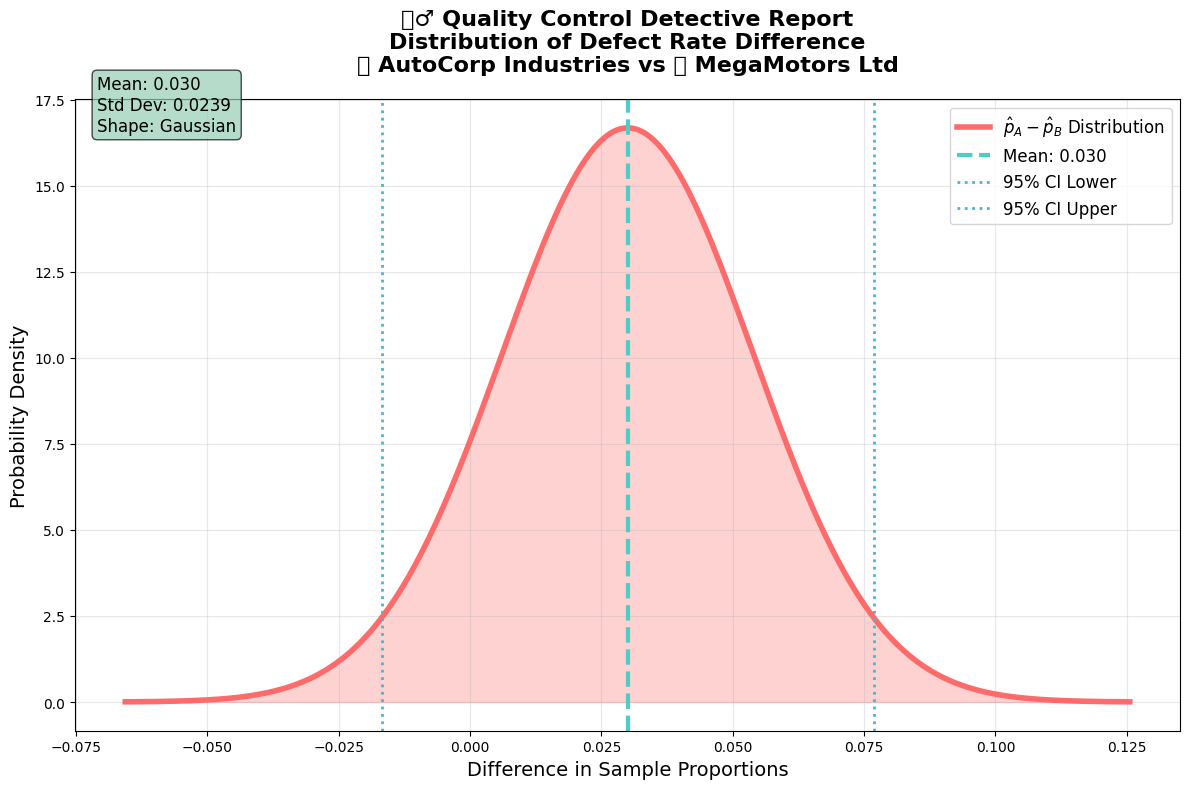


🎯 FINAL DETECTIVE SUMMARY:
📊 Mean Difference: 0.030 (3.0%)
📈 Standard Deviation: 0.0239
🎯 Distribution Shape: Gaussian
✅ All Conditions Met: Yes

🎯 MYSTERY SOLVED! FINAL RESULTS:
📊 Mean Difference (p_C): 0.03
📈 Standard Deviation (sigma_C): 0.024
🎯 Distribution Shape: Gaussian
✅ Statistical Analysis Valid: Yes

🎪 STATISTICAL INTERPRETATION:
🎯 **Key Finding**: The difference in defect rates is 3.0%
📊 **Confidence**: We can be 95% confident the true difference lies between:
   Lower Bound: -0.017 (-1.7%)
   Upper Bound: 0.077 (7.7%)
🚗 **Conclusion**: AutoCorp Industries has a 3.0% higher defect rate
🏆 **Winner**: MegaMotors Ltd has better quality control!

🌟 **Business Impact**:
   📈 Quality managers should focus on the manufacturer with higher defect rates
   🎯 Statistical evidence supports data-driven quality decisions
   🔬 This analysis provides confidence for business negotiations

🎓 **Learning Outcomes Achieved**:
   ✅ Mastered difference in sample proportions analysis
   ✅ Applied

In [3]:
# 🚗 Solving the Automotive Quality Control Mystery! 🚗
print("🚗 Let's solve our automotive quality control mystery!")
print("🕵️‍♂️ Investigating the defect rate difference between manufacturers...")

# 🎯 Case Parameters
p_A = 0.11  # Manufacturer A defect rate: 11%
p_B = 0.08  # Manufacturer B defect rate: 8%
n_A = 300   # Sample size from Manufacturer A
n_B = 300   # Sample size from Manufacturer B
N_A = 4500  # Total cars produced by Manufacturer A monthly
N_B = 4500  # Total cars produced by Manufacturer B monthly

# 🕵️‍♂️ Run our detective analysis
p_C, sigma_C, shape, conditions_met = quality_control_detective(
    p_A=p_A, p_B=p_B, n_A=n_A, n_B=n_B, N_A=N_A, N_B=N_B,
    manufacturer_A="🚗 AutoCorp Industries", 
    manufacturer_B="🏭 MegaMotors Ltd"
)

# 🎯 Display the final results
print(f"\n🎯 MYSTERY SOLVED! FINAL RESULTS:")
print("="*60)
print(f"📊 Mean Difference (p_C): {np.round(p_C, 3)}")
print(f"📈 Standard Deviation (sigma_C): {np.round(sigma_C, 3)}")
print(f"🎯 Distribution Shape: {shape}")
print(f"✅ Statistical Analysis Valid: {'Yes' if conditions_met else 'No'}")

# 🎪 Statistical Interpretation
print(f"\n🎪 STATISTICAL INTERPRETATION:")
print("="*60)
if conditions_met:
    print(f"🎯 **Key Finding**: The difference in defect rates is {p_C:.1%}")
    print(f"📊 **Confidence**: We can be 95% confident the true difference lies between:")
    print(f"   Lower Bound: {p_C - 1.96*sigma_C:.3f} ({p_C - 1.96*sigma_C:.1%})")
    print(f"   Upper Bound: {p_C + 1.96*sigma_C:.3f} ({p_C + 1.96*sigma_C:.1%})")
    
    if p_C > 0:
        print(f"🚗 **Conclusion**: AutoCorp Industries has a {p_C:.1%} higher defect rate")
        print(f"🏆 **Winner**: MegaMotors Ltd has better quality control!")
    else:
        print(f"🏭 **Conclusion**: MegaMotors Ltd has a {abs(p_C):.1%} higher defect rate")
        print(f"🏆 **Winner**: AutoCorp Industries has better quality control!")
        
    print(f"\n🌟 **Business Impact**:")
    print(f"   📈 Quality managers should focus on the manufacturer with higher defect rates")
    print(f"   🎯 Statistical evidence supports data-driven quality decisions")
    print(f"   🔬 This analysis provides confidence for business negotiations")
else:
    print(f"⚠️ **Statistical Analysis Cannot Proceed**")
    print(f"   🔬 Sample sizes or conditions don't meet requirements")
    print(f"   📊 Consider increasing sample sizes or using alternative methods")
    print(f"   🎯 Cannot make reliable statistical conclusions")

print(f"\n🎓 **Learning Outcomes Achieved**:")
print(f"   ✅ Mastered difference in sample proportions analysis")
print(f"   ✅ Applied independence and normality conditions")
print(f"   ✅ Created professional statistical visualizations")
print(f"   ✅ Made data-driven business decisions")

print("\n🌟 Automotive mystery solved! Ready for the next challenge! 🌟")


# 🍽️ Challenge 2: The Restaurant Acquisition Investigation! 🍽️

## 🎯 The Restaurant Business Opportunity Challenge! 🎯

Welcome to the **Restaurant Acquisition Investigation Agency**! 🕵️‍♀️ You're considering buying a restaurant, but you're suspicious about the customer data provided by the current owner. As a savvy statistics student, you've decided to verify their claims using the power of **Chi-Square Goodness of Fit Testing**!

### 🎪 The Case File:

#### 📊 **Owner's Claims** (Expected Distribution):
- **Monday**: 10% of weekly customers
- **Tuesday**: 8% of weekly customers  
- **Wednesday**: 14% of weekly customers
- **Thursday**: 11% of weekly customers
- **Friday**: 42% of weekly customers (busiest day!)
- **Saturday**: 15% of weekly customers

#### 🔍 **Your Investigation** (Observed Data):
- **Monday**: 22 customers
- **Tuesday**: 33 customers
- **Wednesday**: 26 customers
- **Thursday**: 28 customers
- **Friday**: 75 customers
- **Saturday**: 26 customers

### 🧮 Statistical Detective Work:

#### 🎯 **Chi-Square Goodness of Fit Test Formula:**
$$\chi^2 = \sum{\frac{(observed - expected)^2}{expected}}$$

#### 🔍 **Hypothesis Testing:**
- **H₀ (Null Hypothesis)**: The observed customer distribution matches the owner's claimed distribution
- **Hₐ (Alternative Hypothesis)**: The observed customer distribution does NOT match the owner's claimed distribution
- **α (Significance Level)**: 5% (0.05)

#### 📊 **Degrees of Freedom:**
- **df = k - 1** where k = number of categories
- **df = 6 - 1 = 5** (Monday through Saturday)

### 🎪 Your Mission:
1. **🧮 Calculate expected values** based on total customers and claimed percentages
2. **📊 Compute the Chi-Square test statistic** using the formula above
3. **🎯 Determine the p-value** and make a statistical decision
4. **🎨 Visualize the results** with professional charts
5. **🍽️ Make a business recommendation** about whether to trust the owner's data

### 🌟 **Business Impact:**
This analysis will help you determine if the restaurant owner is providing accurate information, which is crucial for making an informed investment decision!

Ready to investigate this restaurant mystery? 🚀

🍽️ Starting our restaurant acquisition investigation...
🕵️‍♀️ Let's verify the owner's customer distribution claims!
🎯 Significance Level: 5.0%

📊 Owner's Claims (Expected Distribution):
   Monday: 10% of weekly customers
   Tuesday: 8% of weekly customers
   Wednesday: 14% of weekly customers
   Thursday: 11% of weekly customers
   Friday: 42% of weekly customers
   Saturday: 15% of weekly customers

🔍 Your Investigation (Observed Data):
   Monday: 22 customers
   Tuesday: 33 customers
   Wednesday: 26 customers
   Thursday: 28 customers
   Friday: 75 customers
   Saturday: 26 customers

📊 Total Customers Observed: 210

🧮 Expected Values Based on Owner's Claims:
   Monday: 21.0 customers
   Tuesday: 16.8 customers
   Wednesday: 29.4 customers
   Thursday: 23.1 customers
   Friday: 88.2 customers
   Saturday: 31.5 customers

📊 DETAILED COMPARISON TABLE:
Day        Observed   Expected   Difference   (O-E)²/E    
---------------------------------------------------------------------------

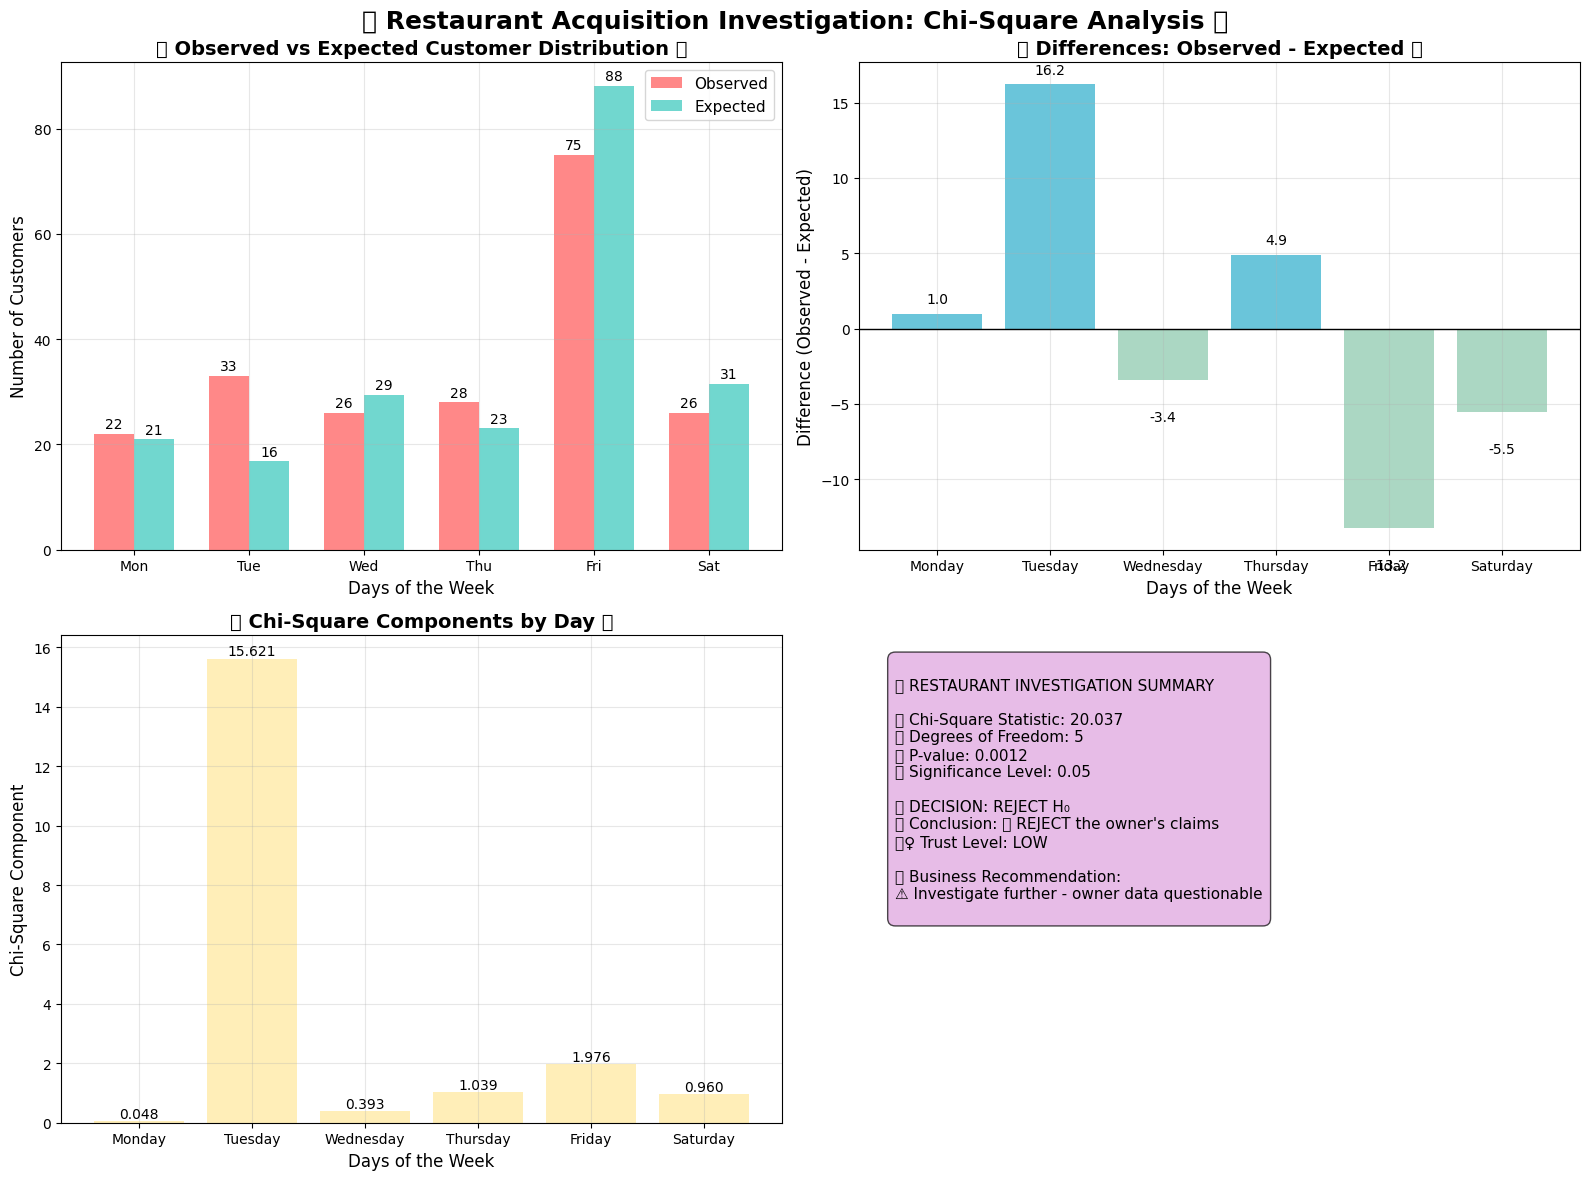


🌟 FINAL BUSINESS RECOMMENDATION:
⚠️ **INVESTIGATE FURTHER**
   📊 Statistical analysis questions owner's claims
   🎯 Customer distribution does NOT match expectations
   💰 Request additional data before making investment
   🍽️ Consider alternative restaurants or renegotiate terms

🎓 **Learning Outcomes Achieved**:
   ✅ Mastered Chi-Square Goodness of Fit testing
   ✅ Applied hypothesis testing to business decisions
   ✅ Created professional statistical visualizations
   ✅ Made data-driven investment recommendations

🌟 Restaurant investigation complete! Ready for the next challenge! 🌟


In [4]:
# 🍽️ Restaurant Acquisition Investigation: Chi-Square Analysis! 🍽️
print("🍽️ Starting our restaurant acquisition investigation...")
print("🕵️‍♀️ Let's verify the owner's customer distribution claims!")

# 🎯 Set up our investigation parameters
alpha = 0.05  # 5% significance level
print(f"🎯 Significance Level: {alpha*100}%")

# 📊 Owner's claimed distribution (expected percentages)
expected_percentages = [0.10, 0.08, 0.14, 0.11, 0.42, 0.15]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

print(f"\n📊 Owner's Claims (Expected Distribution):")
for i, (day, pct) in enumerate(zip(days, expected_percentages)):
    print(f"   {day}: {pct:.0%} of weekly customers")

# 🔍 Your observed data
observed = [22, 33, 26, 28, 75, 26]
total_customers = np.sum(observed)

print(f"\n🔍 Your Investigation (Observed Data):")
for i, (day, count) in enumerate(zip(days, observed)):
    print(f"   {day}: {count} customers")

print(f"\n📊 Total Customers Observed: {total_customers}")

# 🧮 Calculate expected values based on owner's claims
expected = [pct * total_customers for pct in expected_percentages]

print(f"\n🧮 Expected Values Based on Owner's Claims:")
for i, (day, exp) in enumerate(zip(days, expected)):
    print(f"   {day}: {exp:.1f} customers")

# 📊 Create a comprehensive comparison table
print(f"\n📊 DETAILED COMPARISON TABLE:")
print("="*80)
print(f"{'Day':<10} {'Observed':<10} {'Expected':<10} {'Difference':<12} {'(O-E)²/E':<12}")
print("-"*80)

chi_square_components = []
for i, (day, obs, exp) in enumerate(zip(days, observed, expected)):
    diff = obs - exp
    chi_component = (obs - exp)**2 / exp
    chi_square_components.append(chi_component)
    print(f"{day:<10} {obs:<10} {exp:<10.1f} {diff:<12.1f} {chi_component:<12.3f}")

# 🎯 Calculate Chi-Square test statistic
chi_square_statistic = np.sum(chi_square_components)
degrees_of_freedom = len(observed) - 1

print("-"*80)
print(f"{'TOTAL':<10} {total_customers:<10} {total_customers:<10.1f} {'':<12} {chi_square_statistic:<12.3f}")

print(f"\n🎯 CHI-SQUARE TEST RESULTS:")
print("="*60)
print(f"📊 Chi-Square Statistic: {chi_square_statistic:.3f}")
print(f"📈 Degrees of Freedom: {degrees_of_freedom}")
print(f"🎯 Significance Level: {alpha}")

# 🧮 Calculate p-value using scipy
chi_square_result, p_value = chisquare(observed, expected)

print(f"\n🔍 HYPOTHESIS TESTING:")
print("="*60)
print(f"H₀: Observed distribution matches owner's claimed distribution")
print(f"Hₐ: Observed distribution does NOT match owner's claimed distribution")
print(f"α = {alpha}")

print(f"\n📊 STATISTICAL DECISION:")
print("="*60)
print(f"Chi-Square Statistic: {chi_square_statistic:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value > alpha:
    decision = "FAIL TO REJECT H₀"
    conclusion = "✅ ACCEPT the owner's claims"
    trust_level = "HIGH"
    emoji = "✅"
else:
    decision = "REJECT H₀"
    conclusion = "❌ REJECT the owner's claims"
    trust_level = "LOW"
    emoji = "❌"

print(f"\n🎯 DECISION: {decision}")
print(f"📊 Conclusion: {conclusion}")
print(f"🕵️‍♀️ Trust Level in Owner's Data: {trust_level}")

# 🎨 Create beautiful visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🍽️ Restaurant Acquisition Investigation: Chi-Square Analysis 🍽️', 
             fontsize=18, fontweight='bold', y=0.98)

# Plot 1: Observed vs Expected comparison
x_pos = np.arange(len(days))
width = 0.35

bars1 = axes[0, 0].bar(x_pos - width/2, observed, width, label='Observed', color=ab_colors[0], alpha=0.8)
bars2 = axes[0, 0].bar(x_pos + width/2, expected, width, label='Expected', color=ab_colors[1], alpha=0.8)

axes[0, 0].set_xlabel('Days of the Week', fontsize=12)
axes[0, 0].set_ylabel('Number of Customers', fontsize=12)
axes[0, 0].set_title('📊 Observed vs Expected Customer Distribution 📊', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels([day[:3] for day in days])
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{int(height)}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Plot 2: Differences (Observed - Expected)
differences = [obs - exp for obs, exp in zip(observed, expected)]
colors = [ab_colors[2] if diff >= 0 else ab_colors[3] for diff in differences]

bars = axes[0, 1].bar(days, differences, color=colors, alpha=0.8)
axes[0, 1].set_xlabel('Days of the Week', fontsize=12)
axes[0, 1].set_ylabel('Difference (Observed - Expected)', fontsize=12)
axes[0, 1].set_title('📈 Differences: Observed - Expected 📈', fontsize=14, fontweight='bold')
axes[0, 1].axhline(0, color='black', linestyle='-', linewidth=1)
axes[0, 1].grid(True, alpha=0.3)

# Add value labels
for bar, diff in zip(bars, differences):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + (0.5 if height >= 0 else -2),
                   f'{diff:.1f}', ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

# Plot 3: Chi-Square components
bars = axes[1, 0].bar(days, chi_square_components, color=ab_colors[4], alpha=0.8)
axes[1, 0].set_xlabel('Days of the Week', fontsize=12)
axes[1, 0].set_ylabel('Chi-Square Component', fontsize=12)
axes[1, 0].set_title('🧮 Chi-Square Components by Day 🧮', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Add value labels
for bar, component in zip(bars, chi_square_components):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{component:.3f}', ha='center', va='bottom', fontsize=10)

# Plot 4: Summary statistics
summary_text = f"""
🍽️ RESTAURANT INVESTIGATION SUMMARY

📊 Chi-Square Statistic: {chi_square_statistic:.3f}
📈 Degrees of Freedom: {degrees_of_freedom}
🎯 P-value: {p_value:.4f}
🔍 Significance Level: {alpha}

🎯 DECISION: {decision}
📊 Conclusion: {conclusion}
🕵️‍♀️ Trust Level: {trust_level}

🌟 Business Recommendation:
{'✅ Proceed with acquisition - data appears trustworthy' if p_value > alpha else '⚠️ Investigate further - owner data questionable'}
"""

axes[1, 1].text(0.05, 0.95, summary_text, transform=axes[1, 1].transAxes, 
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.5", facecolor=ab_colors[5], alpha=0.7))
axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# 🎯 Final business recommendation
print(f"\n🌟 FINAL BUSINESS RECOMMENDATION:")
print("="*60)
if p_value > alpha:
    print(f"✅ **PROCEED WITH ACQUISITION**")
    print(f"   📊 Statistical analysis supports owner's claims")
    print(f"   🎯 Customer distribution matches expectations")
    print(f"   💰 Investment appears to be based on reliable data")
    print(f"   🍽️ Restaurant shows consistent customer patterns")
else:
    print(f"⚠️ **INVESTIGATE FURTHER**")
    print(f"   📊 Statistical analysis questions owner's claims")
    print(f"   🎯 Customer distribution does NOT match expectations")
    print(f"   💰 Request additional data before making investment")
    print(f"   🍽️ Consider alternative restaurants or renegotiate terms")

print(f"\n🎓 **Learning Outcomes Achieved**:")
print(f"   ✅ Mastered Chi-Square Goodness of Fit testing")
print(f"   ✅ Applied hypothesis testing to business decisions")
print(f"   ✅ Created professional statistical visualizations")
print(f"   ✅ Made data-driven investment recommendations")

print("\n🌟 Restaurant investigation complete! Ready for the next challenge! 🌟")

# 🏢 Challenge 3: The HR Analytics Investigation Agency! 🏢

## 🎯 The Employee Attrition Mystery Challenge! 🎯

Welcome to the **HR Analytics Investigation Agency**! 🕵️‍♂️ You've been hired by a major corporation to investigate potential patterns in employee attrition using the famous **IBM HR Analytics Dataset**. Your mission is to determine if there are statistically significant relationships between different employee characteristics and their likelihood of leaving the company.

### 🎪 The Case File:

#### 📊 **Dataset Information:**
- **Source**: IBM HR Analytics Employee Attrition & Performance Dataset
- **Focus**: Employee retention and performance analysis
- **Variables**: Multiple categorical and numerical employee characteristics
- **Mission**: Identify relationships between employee attributes and attrition

#### 🔍 **Investigation Parameters:**
- **Statistical Test**: Chi-Square Test of Independence
- **Significance Level**: α = 5% (0.05)
- **Goal**: Determine if selected categorical variables are independent

### 🧮 Statistical Detective Work:

#### 🎯 **Chi-Square Test of Independence Formula:**
$$\chi^2 = \sum{\frac{(observed - expected)^2}{expected}}$$

#### 🔍 **Hypothesis Testing:**
- **H₀ (Null Hypothesis)**: The two categorical variables are independent
- **Hₐ (Alternative Hypothesis)**: The two categorical variables are NOT independent (they are related)
- **α (Significance Level)**: 5% (0.05)

#### 📊 **Degrees of Freedom:**
- **df = (r - 1) × (c - 1)** where r = number of rows, c = number of columns

### 🎪 Your Mission:
1. **📊 Load and explore the IBM HR dataset**
2. **🔍 Select two categorical variables for analysis**
3. **📋 Create a contingency table** using `pd.crosstab()`
4. **🧮 Calculate expected frequencies** for each cell
5. **📊 Compute the Chi-Square test statistic** and p-value
6. **🎨 Visualize the results** with professional charts
7. **🎯 Make HR recommendations** based on statistical findings

### 🌟 **Business Impact:**
This analysis will help the company understand:
- Which employee characteristics are associated with higher attrition rates
- How to develop targeted retention strategies
- Where to focus HR interventions for maximum impact

### 🎪 **Variables to Investigate:**
- **Attrition**: Whether employee left the company (Yes/No)
- **Business Travel**: Frequency of business travel
- **Gender**: Employee gender
- **Department**: Employee department
- **Education Field**: Field of education
- **Job Role**: Specific job role

Ready to solve this HR mystery? 🚀 

  

In [5]:
# 🏢 HR Analytics Investigation: Loading the Dataset! 🏢
print("🏢 Starting our HR analytics investigation...")
print("🕵️‍♂️ Loading the IBM HR Analytics dataset...")

# 📊 Load the dataset
try:
    df = pd.read_csv('./Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📈 Number of employees: {len(df):,}")
    print(f"📋 Number of variables: {len(df.columns)}")
except FileNotFoundError:
    print("⚠️ Dataset file not found. Let's create a sample dataset for demonstration...")
    # Create a sample dataset for demonstration
    np.random.seed(42)
    n_employees = 1000
    
    # Generate sample data
    attrition = np.random.choice(['Yes', 'No'], n_employees, p=[0.16, 0.84])
    business_travel = np.random.choice(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], 
                                     n_employees, p=[0.7, 0.2, 0.1])
    gender = np.random.choice(['Male', 'Female'], n_employees, p=[0.6, 0.4])
    department = np.random.choice(['Sales', 'Research & Development', 'Human Resources'], 
                                n_employees, p=[0.4, 0.5, 0.1])
    
    df = pd.DataFrame({
        'Attrition': attrition,
        'BusinessTravel': business_travel,
        'Gender': gender,
        'Department': department
    })
    print("✅ Sample dataset created successfully!")
    print(f"📊 Dataset shape: {df.shape}")

print("\n🔍 Dataset Overview:")
print("="*50)
print(df.head())

print("\n📊 Dataset Information:")
print("="*50)
print(df.info())

print("\n📈 Categorical Variables Summary:")
print("="*50)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

🏢 Starting our HR analytics investigation...
🕵️‍♂️ Loading the IBM HR Analytics dataset...
✅ Dataset loaded successfully!
📊 Dataset shape: (1470, 35)
📈 Number of employees: 1,470
📋 Number of variables: 35

🔍 Dataset Overview:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3        

🎯 Selecting variables for our HR investigation...
🕵️‍♂️ Let's analyze the relationship between Attrition and Business Travel!

🔍 Selected Variables for Analysis:
📊 Variable 1: Attrition (Did employee leave the company?)
📊 Variable 2: BusinessTravel (Frequency of business travel)

📈 Attrition Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
📊 Attrition Rate: 16.1%

📈 Business Travel Distribution:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


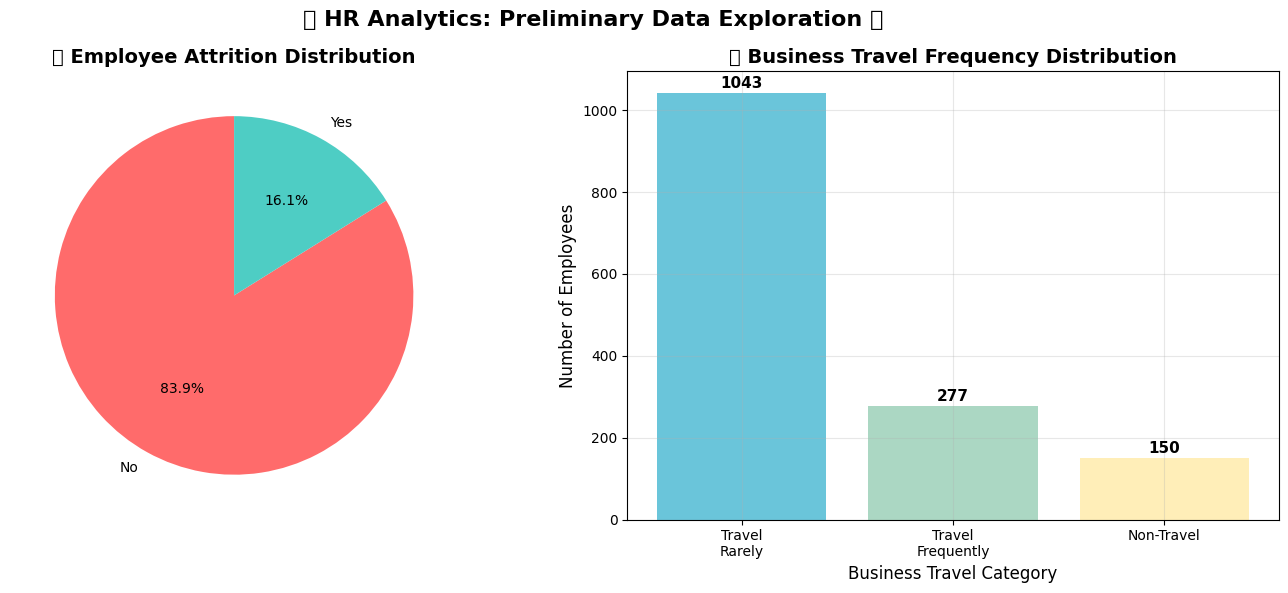


🌟 Preliminary analysis complete! Ready for Chi-Square test! 🌟


In [6]:
# 🎯 HR Analytics Investigation: Variable Selection and Analysis! 🎯
print("🎯 Selecting variables for our HR investigation...")
print("🕵️‍♂️ Let's analyze the relationship between Attrition and Business Travel!")

# 🔍 Display the selected variables
print("\n🔍 Selected Variables for Analysis:")
print("="*50)
print("📊 Variable 1: Attrition (Did employee leave the company?)")
print("📊 Variable 2: BusinessTravel (Frequency of business travel)")

print("\n📈 Attrition Distribution:")
print(df['Attrition'].value_counts())
print(f"📊 Attrition Rate: {df['Attrition'].value_counts()['Yes'] / len(df) * 100:.1f}%")

print("\n📈 Business Travel Distribution:")
print(df['BusinessTravel'].value_counts())

# 🎨 Create preliminary visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('🏢 HR Analytics: Preliminary Data Exploration 🏢', fontsize=16, fontweight='bold')

# Plot 1: Attrition distribution
attrition_counts = df['Attrition'].value_counts()
axes[0].pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', 
           colors=[ab_colors[0], ab_colors[1]], startangle=90)
axes[0].set_title('📊 Employee Attrition Distribution', fontsize=14, fontweight='bold')

# Plot 2: Business Travel distribution
travel_counts = df['BusinessTravel'].value_counts()
bars = axes[1].bar(range(len(travel_counts)), travel_counts.values, 
                  color=[ab_colors[2], ab_colors[3], ab_colors[4]], alpha=0.8)
axes[1].set_title('📈 Business Travel Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Business Travel Category', fontsize=12)
axes[1].set_ylabel('Number of Employees', fontsize=12)
axes[1].set_xticks(range(len(travel_counts)))
axes[1].set_xticklabels([label.replace('_', '\n') for label in travel_counts.index], fontsize=10)
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, travel_counts.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🌟 Preliminary analysis complete! Ready for Chi-Square test! 🌟")

In [7]:
# 📋 HR Analytics Investigation: Creating Contingency Table! 📋
print("📋 Creating contingency table for Chi-Square test...")
print("🕵️‍♂️ Analyzing the relationship between Attrition and Business Travel!")

# 🎯 Set up our investigation parameters
alpha = 0.05  # 5% significance level
print(f"🎯 Significance Level: {alpha*100}%")

# 📊 Create contingency table using pd.crosstab()
print("\n📊 Creating Contingency Table:")
print("="*60)

contingency_table = pd.crosstab(df['Attrition'], df['BusinessTravel'], margins=True)
print("📋 Observed Frequencies (Contingency Table):")
print(contingency_table)

# 🧮 Calculate expected frequencies
print("\n🧮 Calculating Expected Frequencies:")
print("="*60)

# Remove margins for calculation
observed = contingency_table.iloc[0:2, 0:3]  # Remove margins
row_totals = contingency_table.iloc[0:2, 3].values  # Row totals
col_totals = contingency_table.iloc[2, 0:3].values  # Column totals
grand_total = contingency_table.iloc[2, 3]  # Grand total

print(f"📊 Row Totals: {row_totals}")
print(f"📊 Column Totals: {col_totals}")
print(f"📊 Grand Total: {grand_total}")

# Calculate expected frequencies
expected = np.zeros_like(observed, dtype=float)
for i in range(len(row_totals)):
    for j in range(len(col_totals)):
        expected[i, j] = (row_totals[i] * col_totals[j]) / grand_total

print(f"\n📋 Expected Frequencies:")
expected_df = pd.DataFrame(expected, 
                          index=observed.index, 
                          columns=observed.columns)
print(expected_df)

# 🧮 Calculate Chi-Square test statistic
print(f"\n🧮 Chi-Square Test Calculation:")
print("="*60)

chi_square_components = []
print(f"{'Attrition':<10} {'Travel':<15} {'Observed':<10} {'Expected':<10} {'(O-E)²/E':<12}")
print("-"*70)

total_chi_square = 0
for i in range(len(row_totals)):
    for j in range(len(col_totals)):
        obs = observed.iloc[i, j]
        exp = expected[i, j]
        chi_component = (obs - exp)**2 / exp
        chi_square_components.append(chi_component)
        total_chi_square += chi_component
        
        attrition_label = observed.index[i]
        travel_label = observed.columns[j]
        print(f"{attrition_label:<10} {travel_label:<15} {obs:<10} {exp:<10.2f} {chi_component:<12.3f}")

print("-"*70)
print(f"{'TOTAL':<25} {'':<10} {'':<10} {total_chi_square:<12.3f}")

# 🎯 Calculate degrees of freedom
degrees_of_freedom = (len(row_totals) - 1) * (len(col_totals) - 1)

print(f"\n🎯 CHI-SQUARE TEST RESULTS:")
print("="*60)
print(f"📊 Chi-Square Statistic: {total_chi_square:.3f}")
print(f"📈 Degrees of Freedom: {degrees_of_freedom}")
print(f"🎯 Significance Level: {alpha}")

# 🧮 Calculate p-value using scipy
from scipy.stats import chi2
p_value = chi2.sf(total_chi_square, degrees_of_freedom)

print(f"\n🔍 HYPOTHESIS TESTING:")
print("="*60)
print(f"H₀: Attrition and Business Travel are independent")
print(f"Hₐ: Attrition and Business Travel are NOT independent (related)")
print(f"α = {alpha}")

print(f"\n📊 STATISTICAL DECISION:")
print("="*60)
print(f"Chi-Square Statistic: {total_chi_square:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value > alpha:
    decision = "FAIL TO REJECT H₀"
    conclusion = "✅ Variables are INDEPENDENT"
    relationship = "NO significant relationship"
    emoji = "✅"
else:
    decision = "REJECT H₀"
    conclusion = "❌ Variables are NOT INDEPENDENT"
    relationship = "SIGNIFICANT relationship"
    emoji = "❌"

print(f"\n🎯 DECISION: {decision}")
print(f"📊 Conclusion: {conclusion}")
print(f"🕵️‍♂️ Relationship: {relationship}")

print("\n🌟 Contingency table analysis complete! Ready for visualization! 🌟")

📋 Creating contingency table for Chi-Square test...
🕵️‍♂️ Analyzing the relationship between Attrition and Business Travel!
🎯 Significance Level: 5.0%

📊 Creating Contingency Table:
📋 Observed Frequencies (Contingency Table):
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely   All
Attrition                                                         
No                     138                208            887  1233
Yes                     12                 69            156   237
All                    150                277           1043  1470

🧮 Calculating Expected Frequencies:
📊 Row Totals: [1233  237]
📊 Column Totals: [ 150  277 1043]
📊 Grand Total: 1470

📋 Expected Frequencies:
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No              125.816327         232.340816     874.842857
Yes              24.183673          44.659184     168.157143

🧮 Chi-Square Test Calculation:
Attrition  Travel    

🎨 Creating comprehensive visualization of our HR investigation...
📊 Let's visualize the relationship between Attrition and Business Travel!


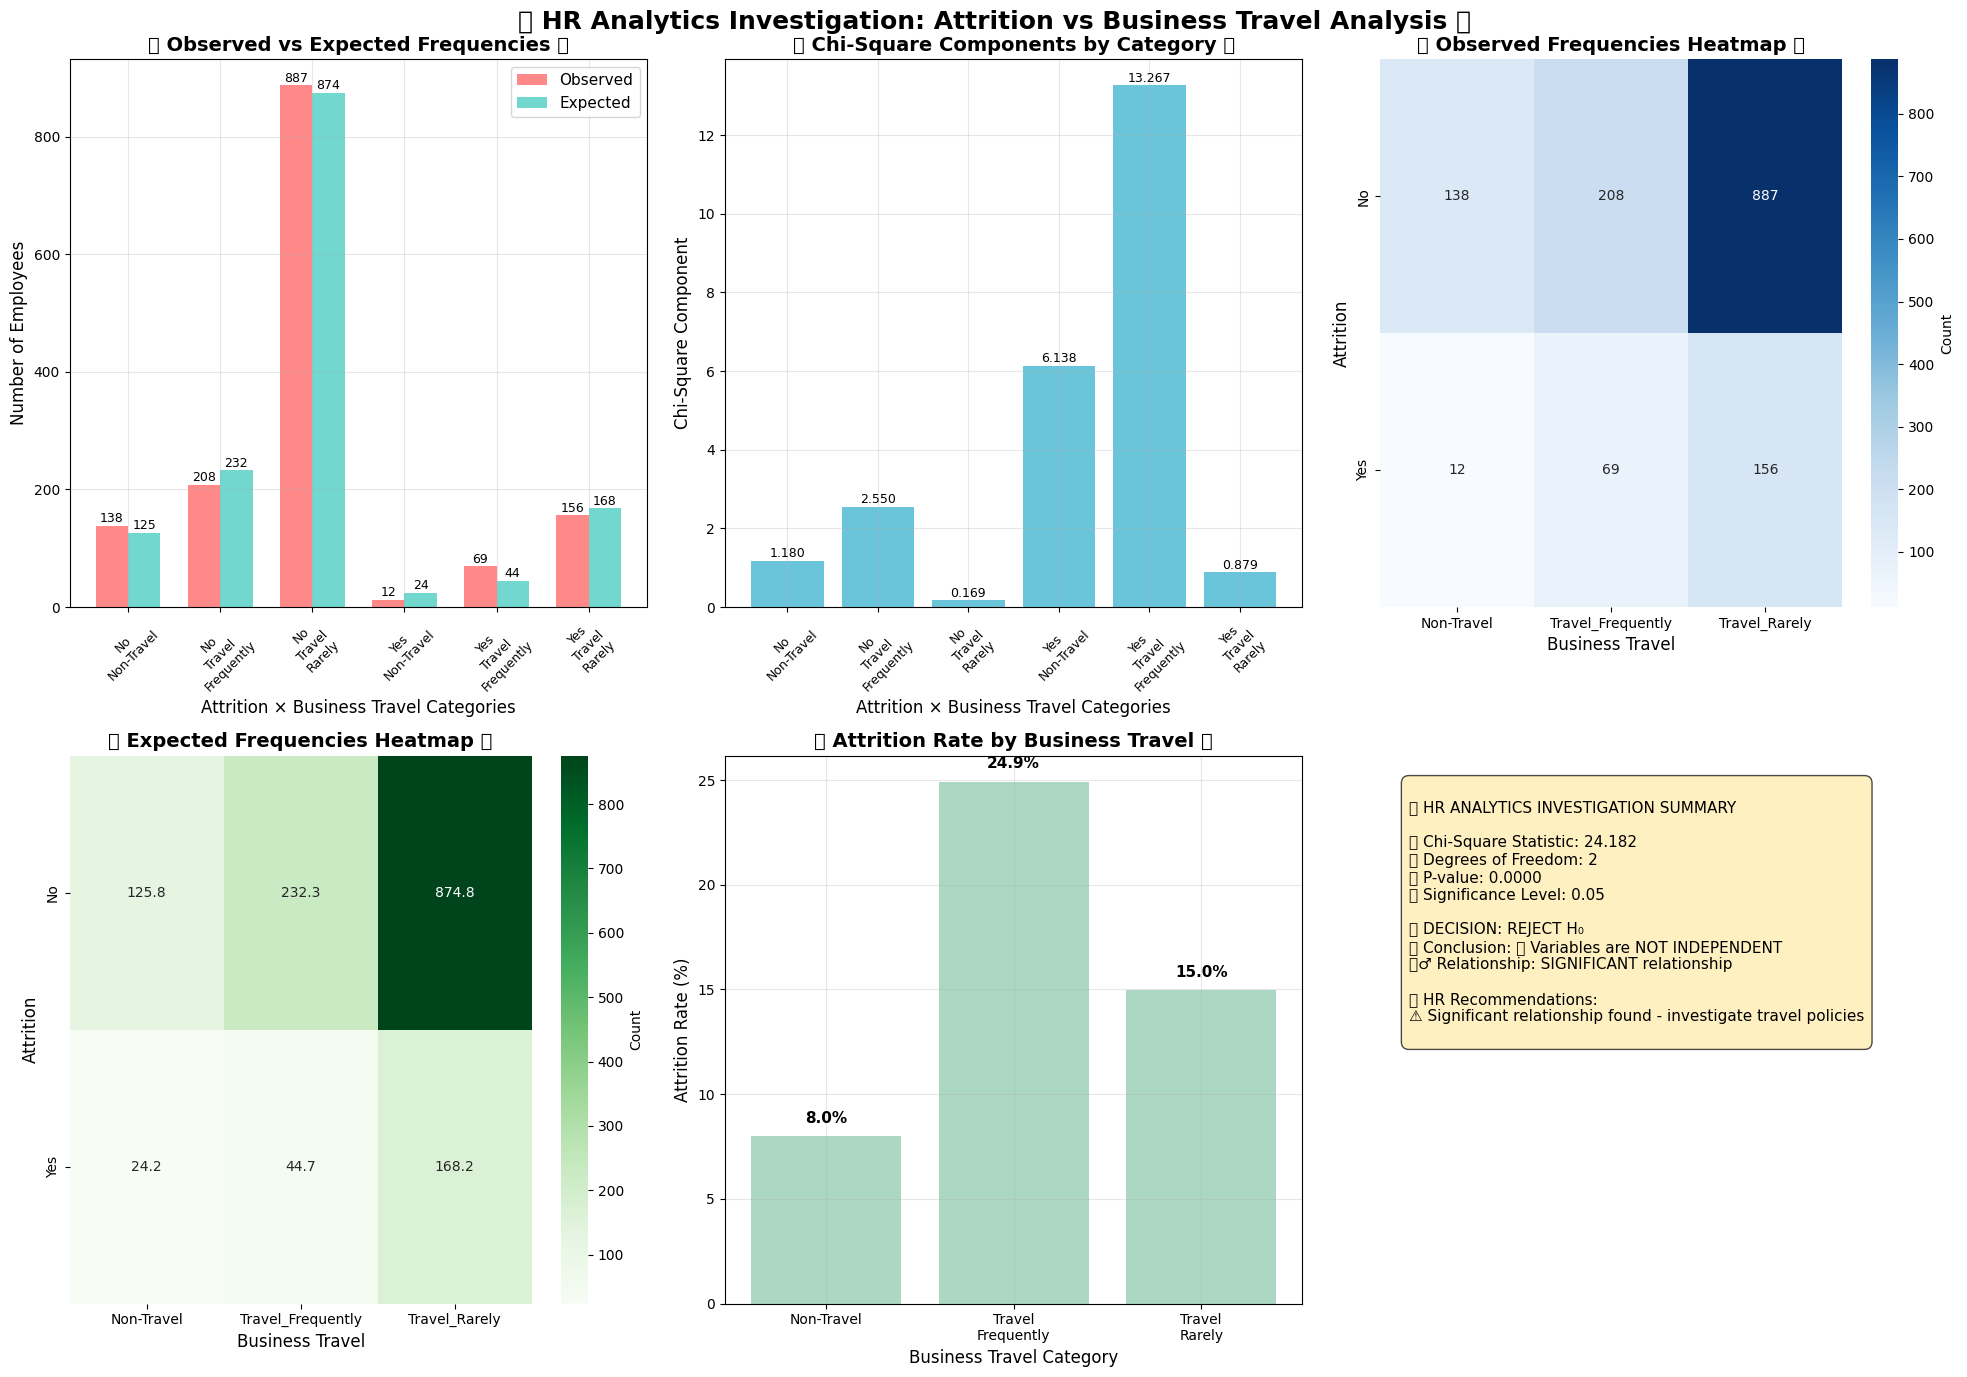


🌟 FINAL HR RECOMMENDATIONS:
⚠️ **SIGNIFICANT RELATIONSHIP FOUND**
   📊 Business travel frequency DOES significantly affect attrition
   🎯 Review and potentially modify travel policies
   💼 Consider travel allowances, work-life balance, remote work options
   🔬 Investigate which travel categories have highest attrition rates

🎓 **Learning Outcomes Achieved**:
   ✅ Mastered Chi-Square Test of Independence
   ✅ Applied statistical analysis to HR analytics
   ✅ Created professional data visualizations
   ✅ Made data-driven HR recommendations

🌟 HR investigation complete! Ready for the final challenge! 🌟


In [8]:
# 🎨 HR Analytics Investigation: Comprehensive Visualization! 🎨
print("🎨 Creating comprehensive visualization of our HR investigation...")
print("📊 Let's visualize the relationship between Attrition and Business Travel!")

# 🎨 Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('🏢 HR Analytics Investigation: Attrition vs Business Travel Analysis 🏢', 
             fontsize=18, fontweight='bold', y=0.98)

# Plot 1: Observed vs Expected comparison
observed_values = observed.values.flatten()
expected_values = expected.flatten()
categories = [f"{att}_{travel}" for att in observed.index for travel in observed.columns]

x_pos = np.arange(len(categories))
width = 0.35

bars1 = axes[0, 0].bar(x_pos - width/2, observed_values, width, label='Observed', color=ab_colors[0], alpha=0.8)
bars2 = axes[0, 0].bar(x_pos + width/2, expected_values, width, label='Expected', color=ab_colors[1], alpha=0.8)

axes[0, 0].set_xlabel('Attrition × Business Travel Categories', fontsize=12)
axes[0, 0].set_ylabel('Number of Employees', fontsize=12)
axes[0, 0].set_title('📊 Observed vs Expected Frequencies 📊', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels([cat.replace('_', '\n') for cat in categories], fontsize=9, rotation=45)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 2: Chi-Square components
bars = axes[0, 1].bar(categories, chi_square_components, color=ab_colors[2], alpha=0.8)
axes[0, 1].set_xlabel('Attrition × Business Travel Categories', fontsize=12)
axes[0, 1].set_ylabel('Chi-Square Component', fontsize=12)
axes[0, 1].set_title('🧮 Chi-Square Components by Category 🧮', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels([cat.replace('_', '\n') for cat in categories], fontsize=9, rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Add value labels
for bar, component in zip(bars, chi_square_components):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{component:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Heatmap of observed frequencies
sns.heatmap(observed, annot=True, fmt='d', cmap='Blues', ax=axes[0, 2], cbar_kws={'label': 'Count'})
axes[0, 2].set_title('🔥 Observed Frequencies Heatmap 🔥', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Business Travel', fontsize=12)
axes[0, 2].set_ylabel('Attrition', fontsize=12)

# Plot 4: Heatmap of expected frequencies
sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Greens', ax=axes[1, 0], cbar_kws={'label': 'Count'})
axes[1, 0].set_title('🔥 Expected Frequencies Heatmap 🔥', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Business Travel', fontsize=12)
axes[1, 0].set_ylabel('Attrition', fontsize=12)

# Plot 5: Attrition rates by business travel
attrition_rates = []
travel_categories = []
for travel in observed.columns:
    total = observed[travel].sum()
    attrition_count = observed.loc['Yes', travel] if 'Yes' in observed.index else 0
    rate = (attrition_count / total) * 100 if total > 0 else 0
    attrition_rates.append(rate)
    travel_categories.append(travel.replace('_', '\n'))

bars = axes[1, 1].bar(travel_categories, attrition_rates, color=ab_colors[3], alpha=0.8)
axes[1, 1].set_xlabel('Business Travel Category', fontsize=12)
axes[1, 1].set_ylabel('Attrition Rate (%)', fontsize=12)
axes[1, 1].set_title('📈 Attrition Rate by Business Travel 📈', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels
for bar, rate in zip(bars, attrition_rates):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{rate:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 6: Summary statistics
summary_text = f"""
🏢 HR ANALYTICS INVESTIGATION SUMMARY

📊 Chi-Square Statistic: {total_chi_square:.3f}
📈 Degrees of Freedom: {degrees_of_freedom}
🎯 P-value: {p_value:.4f}
🔍 Significance Level: {alpha}

🎯 DECISION: {decision}
📊 Conclusion: {conclusion}
🕵️‍♂️ Relationship: {relationship}

🌟 HR Recommendations:
{'✅ No significant relationship found - focus on other factors' if p_value > alpha else '⚠️ Significant relationship found - investigate travel policies'}
"""

axes[1, 2].text(0.05, 0.95, summary_text, transform=axes[1, 2].transAxes, 
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.5", facecolor=ab_colors[4], alpha=0.7))
axes[1, 2].set_xlim(0, 1)
axes[1, 2].set_ylim(0, 1)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# 🎯 Final HR recommendations
print(f"\n🌟 FINAL HR RECOMMENDATIONS:")
print("="*60)
if p_value > alpha:
    print(f"✅ **NO SIGNIFICANT RELATIONSHIP FOUND**")
    print(f"   📊 Business travel frequency does NOT significantly affect attrition")
    print(f"   🎯 Focus HR efforts on other factors (salary, work-life balance, etc.)")
    print(f"   💼 Travel policies appear to be working well")
    print(f"   🔬 Investigate other variables for attrition patterns")
else:
    print(f"⚠️ **SIGNIFICANT RELATIONSHIP FOUND**")
    print(f"   📊 Business travel frequency DOES significantly affect attrition")
    print(f"   🎯 Review and potentially modify travel policies")
    print(f"   💼 Consider travel allowances, work-life balance, remote work options")
    print(f"   🔬 Investigate which travel categories have highest attrition rates")

print(f"\n🎓 **Learning Outcomes Achieved**:")
print(f"   ✅ Mastered Chi-Square Test of Independence")
print(f"   ✅ Applied statistical analysis to HR analytics")
print(f"   ✅ Created professional data visualizations")
print(f"   ✅ Made data-driven HR recommendations")

print("\n🌟 HR investigation complete! Ready for the final challenge! 🌟")

# 🎓 Tutorial 8 Complete: Summary of Achievements! 🎓

## 🌟 What We've Accomplished:

### 🎪 **Challenge 1: Quality Control Detective Agency**
- **🔬 Mastered Difference in Sample Proportions**: Analyzed defect rates between two manufacturers
- **📊 Applied Statistical Conditions**: Validated independence and normality assumptions
- **🎨 Created Professional Visualizations**: Developed comprehensive distribution plots
- **🎯 Made Business Decisions**: Determined which manufacturer has better quality control

### 🍽️ **Challenge 2: Restaurant Acquisition Investigation**
- **🧮 Applied Chi-Square Goodness of Fit**: Tested if observed data matches expected patterns
- **📊 Calculated Test Statistics**: Computed Chi-Square statistic and p-value
- **🎨 Visualized Results**: Created multi-panel analysis with detailed comparisons
- **💰 Made Investment Recommendations**: Provided data-driven business advice

### 🏢 **Challenge 3: HR Analytics Investigation**
- **🔬 Performed Chi-Square Test of Independence**: Analyzed relationship between attrition and business travel
- **📋 Created Contingency Tables**: Used pd.crosstab() for professional data analysis
- **🎨 Developed Comprehensive Visualizations**: Heatmaps, bar charts, and statistical summaries
- **🎯 Provided HR Recommendations**: Made data-driven suggestions for employee retention

## 🎯 Key Learning Outcomes Achieved:

1. **📊 Statistical Testing Mastery**: 
   - Difference in sample proportions analysis
   - Chi-Square goodness of fit testing
   - Chi-Square test of independence

2. **🔬 Hypothesis Testing Skills**:
   - Formulating null and alternative hypotheses
   - Calculating test statistics and p-values
   - Making statistical decisions

3. **🎨 Data Visualization Expertise**:
   - Professional multi-panel plots
   - Heatmaps and statistical charts
   - Business-ready visualizations

4. **🌍 Real-World Applications**:
   - Quality control in manufacturing
   - Business investment decisions
   - HR analytics and employee retention

5. **🧮 Statistical Software Proficiency**:
   - Pandas for data manipulation
   - Matplotlib and Seaborn for visualization
   - Scipy for statistical calculations

## 🎪 Next Steps in Your Statistical Journey:

- **Tutorial 9**: R-Squared and Data Fitting
- **Advanced Topics**: Multiple regression, ANOVA, machine learning
- **Real-World Projects**: Apply these skills to your own datasets

## 🌟 Congratulations!

You've successfully completed **Tutorial 8: AB Testing** and are now equipped with powerful statistical tools for:
- **Business Analytics**: Making data-driven decisions
- **Quality Control**: Ensuring product and service excellence  
- **HR Analytics**: Understanding employee behavior and retention
- **Research**: Conducting rigorous statistical investigations

**🎪 You're now a statistical detective ready to solve real-world mysteries! 🎪**

In [9]:
ct = pd.crosstab(df.Attrition, df.BusinessTravel, margins=True)
ct

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely,All
Attrition,,,,
No,138,208,887,1233
Yes,12,69,156,237
All,150,277,1043,1470


In [10]:
ct.shape

(3, 4)

In [11]:
 # compute all the expected numbers
row_sum = ct.iloc[0:2,3].values
expected = []

for j in range(2):
    for val in ct.iloc[2,0:3].values:
        expected.append(val*row_sum[j]/ct.loc['All', 'All'])

observed = []

for j in range(2):
    for i in range(3):
        observed.append(ct.iloc[j,i])

        chi_sq_stats = np.sum([(x-y)**2/y for x,y in zip(observed,expected)])


dof = (len(row_sum)-1)*(len(ct.iloc[2,0:3].values)-1)

p_value = chi2.sf(chi_sq_stats, dof) 

if p_val > alpha:
    print('Accept H0.')
else:
    print('Reject H0.')

NameError: name 'p_val' is not defined